In [ ]:
#Total Frames
import cv2

cap = cv2.VideoCapture("../video/test.mov")
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print( length )


In [ ]:
# import the necessary packages
from ..convenience import is_cv3
import cv2

def count_frames(path, override=False):
	# grab a pointer to the video file and initialize the total
	# number of frames read
	video = cv2.VideoCapture(path)
	total = 0

	# if the override flag is passed in, revert to the manual
	# method of counting frames
	if override:
		total = count_frames_manual(video)

	# otherwise, let's try the fast way first
	else:
		# lets try to determine the number of frames in a video
		# via video properties; this method can be very buggy
		# and might throw an error based on your OpenCV version
		# or may fail entirely based on your which video codecs
		# you have installed
		try:
			# check if we are using OpenCV 3
			if is_cv3():
				total = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

			# otherwise, we are using OpenCV 2.4
			else:
				total = int(video.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT))

		# uh-oh, we got an error -- revert to counting manually
		except:
			total = count_frames_manual(video)

	# release the video file pointer
	video.release()

	# return the total number of frames in the video
	return total

def count_frames_manual(video):
	# initialize the total number of frames read
	total = 0

	# loop over the frames of the video
	while True:
		# grab the current frame
		(grabbed, frame) = video.read()
	 
		# check to see if we have reached the end of the
		# video
		if not grabbed:
			break

		# increment the total number of frames read
		total += 1

	# return the total number of frames in the video file
	return total


In [ ]:
##read_display_Video_frames
import cv2
import numpy as np
 
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('temp.mp4')
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
 
    # Display the resulting frame
    cv2.imshow('Frame',frame)
 
    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'): ##Wait time is in milliseconds
      break
 
  # Break the loop
  else: 
    break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()

## Read video details
import cv2

fn = 'test.mp4'
cap = cv2.VideoCapture(fn)

# # if not cap.isOpened(): 
# #     print "could not open :",fn
# #     return

total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = cap.get(cv2.CAP_PROP_FPS)
duration = float(total_frames/fps)

print(total_frames)
print(width)
print(height)
print(fps)
print(duration)

In [ ]:
##Simple image thresholding

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../../mobile/image1.jpeg',0)
# img = cv2.imread('../../mobile/image2.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

cv2.imshow('Original',img)
# cv2.imshow('Thresh1',thresh1)
# cv2.imshow('Thresh2',thresh2)
# cv2.imshow('Thresh3',thresh3)
# cv2.imshow('Thresh4',thresh4)
# cv2.imshow('Thresh5',thresh5)

# for i in range(6):
#     plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
#     plt.title(titles[i])
#     plt.xticks([]),plt.yticks([])

# plt.show()

In [ ]:
# Python program to read image using OpenCV 

# importing OpenCV(cv2) module 
import cv2 

# Save image in set directory 
# Read RGB image 
img = cv2.imread('2.jpg') 

# Output img with window name as 'image' 
cv2.imshow('image', img) 

# Maintain output window utill 
# user presses a key 
cv2.waitKey(0)

# Destroying present windows on screen 
cv2.destroyAllWindows() 


# Python program to read  
# image using matplotlib 
  
# importing matplotlib modules 
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
  
# Read Images 
img = mpimg.imread('g4g.png') 
  
# Output Images 
plt.imshow(img) 


In [ ]:
## Adaptive Thresholding
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('../../mobile/image1.jpeg',0)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)','Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
##Check dpi of an image
from PIL import Image
im = Image.open('../test_images/mobile/image1.jpeg')
print(im.info)

In [ ]:
## Read the resoltion of an image

def jpeg_res(filename):
   """"This function prints the resolution of the jpeg image file passed into it"""

   # open image for reading in binary mode
   with open(filename,'rb') as img_file:

       # height of image (in 2 bytes) is at 164th position
       img_file.seek(163)

       # read the 2 bytes
       a = img_file.read(2)

       # calculate height
       height = (a[0] << 8) + a[1]

       # next 2 bytes is width
       a = img_file.read(2)

       # calculate width
       width = (a[0] << 8) + a[1]

   print("The resolution of the image is",width,"x",height)

jpeg_res("../test_images/mobile/image1.jpeg")

In [ ]:
##Detect_count2.py
# import the necessary packages
import numpy as np
# import argparse
import imutils
import cv2
  
# # construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
#     help="path to the input image")
# ap.add_argument("-o", "--output", required=True,
#     help="path to the output image")
# args = vars(ap.parse_args())
  
# load the image
# image_orig = cv2.imread(args["image"])

image_orig = cv2.imread("./../test_images/BINARY.png")

# dict to count colonies
counter = {}

#print (image_orig)
height_orig, width_orig = image_orig.shape[:2]
 
# output image with contours
image_contours = image_orig.copy()
 
# DETECTING WHITE COLONIES
colors = {
    'white': ((150, 150, 150), (255, 255, 255))
    # 'blue': ((255, 0, 0), (255, 125, 125)),
    # 'yellow' ....
}
# colors = ['white']
for color in colors:
 
    # copy of original image
    image_to_process = image_orig.copy()
 
    # initializes counter
    counter[color] = 0
 
    # define NumPy arrays of color boundaries (GBR vectors)
    if color == 'white':
        # invert image colors
        image_to_process = (255-image_to_process)
        lower = np.array([ 50,  50,  40])
        upper = np.array([255, 255,  255])
 
    # find the colors within the specified boundaries
    image_mask = cv2.inRange(image_to_process, lower, upper)
    # apply the mask
    image_res = cv2.bitwise_and(image_to_process, image_to_process, mask = image_mask)
 
    ## load the image, convert it to grayscale, and blur it slightly
    image_gray = cv2.cvtColor(image_res, cv2.COLOR_BGR2GRAY)
    image_gray = cv2.GaussianBlur(image_gray, (5, 5), 0)
 
    # perform edge detection, then perform a dilation + erosion to close gaps in between object edges
    image_edged = cv2.Canny(image_gray, 50, 100)
    image_edged = cv2.dilate(image_edged, None, iterations=1)
    image_edged = cv2.erode(image_edged, None, iterations=1)
 
    # find contours in the edge map
    cnts, cnts1 = cv2.findContours(image_edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if imutils.is_cv2() else cnts[1]
 
    # loop over the contours individually
    for c in cnts:
         
        # if the contour is not sufficiently large, ignore it
        if ((cv2.contourArea(c) < 5) or (cv2.contourArea(c) > 137)) :
            continue
        #  ontourArea(contours[i]);
        # compute the Convex Hull of the contour
        hull = cv2.convexHull(c)
        if color == 'white':
            # prints contours in green color
            cv2.drawContours(image_contours,[hull],0,(0,255,0),1)
 
        counter[color] += 1
        #cv2.putText(image_contours, "{:.0f}".format(cv2.contourArea(c)), (int(hull[0][0][0]), int(hull[0][0][1])), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 255, 255), 2)
 
    # Print the number of colonies of each color
    print("{} {} colonies".format(counter[color],color))
 
# # Writes the output image
# cv2.imwrite(args["output"],image_contours)

cv2.imwrite("./../output/1.png",image_contours)

# Also shows the result image
cv2.imshow('Result_image',image_contours)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
'''
 * Python program to use contours to count the objects in an image.
 *
 * usage: python Contours.py <filename> <threshold>
'''
import cv2
import sys

# read command-line arguments
filename = "./../test_images/BINARY.png"
t = 50

# read original image
img = cv2.imread(filename)

# create binary image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
(t, binary) = cv2.threshold(blur, t, 255, cv2.THRESH_BINARY)

# find contours
(contours, _) = cv2.findContours(binary, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

# print table of contours and sizes
print("Found %d objects." % len(contours))
for (i, c) in enumerate(contours):
    print("\tSize of contour %d: %d" % (i, len(c)))

# draw contours over original image
cv2.drawContours(img, contours, -1, (0, 0, 255), 5)

# display original image with contours
cv2.namedWindow("output", cv2.WINDOW_NORMAL)
cv2.imshow("output", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
## Not working
import numpy as np
import cv2

im2 = cv2.imread('./../test_images/BINARY.png')
imgray = cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)


#### Find contours of a binary image
###first one is source image, 
###second is contour retrieval mode, 
###third is contour approximation method. 
###It outputs the contours and hierarchy. 
###Contours is a Python list of all the contours in the image. Each individual contour is a Numpy array of (x,y) coordinates of boundary points of the object.
im2, contours = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# im2, contours = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) ## Stores all the boundary points in a contour
#cv2.RETR_EXTERNAL ## Second Argument To detect only boundaries

contours = np.array(contours).reshape((-1,1,2)).astype(np.int32)
#### To draw all the contours in an image:
### ts first argument is source image, 
###second argument is the contours which should be passed as a Python list,
###third argument is index of contours (useful when drawing individual contour. To draw all contours, pass -1) and
###remaining arguments are color, thickness etc.
# cv2.drawContours(thresh, contours, -1, (0,255,0), 3)
###The following method is more useful in complex conditions
cnt = contours[4]
cv2.drawContours(thresh, cnt, 4, (0,0,255), 1) ## Third is contour color and 4th argument is contour thickness

### 
cv2.imshow('output2', thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.0.0) /io/opencv/modules/imgproc/src/drawing.cpp:2498: error: (-215:Assertion failed) 0 <= contourIdx && contourIdx < (int)last in function 'drawContours'


In [ ]:
### Number of contours and size of each contour
print("Found %d objects." % len(contours))
for (i, c) in enumerate(contours):
    print("\tSize of contour %d: %d" % (i, len(c)))


In [10]:
print(cv2.__version__)


4.0.0


In [ ]:
##OPEN CV 4.0.0  ### https://docs.opencv.org/4.0.0/da/d22/tutorial_py_canny.html
### https://mmeysenburg.github.io/image-processing/09-contours/
### https://mmeysenburg.github.io/image-processing/07-thresholding/

import numpy as np
import cv2 as cv
im = cv.imread('./../test_images/BINARY.png')
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

cv.drawContours(im, contours, -1, (0,255,0), 3)

# cv.drawContours(img, contours, 3, (0,255,0), 3)
# cnt = contours[4]
# cv.drawContours(img, [cnt], 0, (0,255,0), 3)
cv2.imshow('output2', im)
cv2.waitKey(0)
cv2.destroyAllWindows()


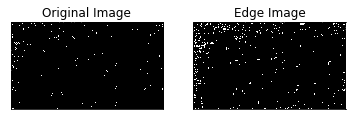

In [2]:
##OPEN CV 4.0.0
### CANNY EDGE DETECTION

import numpy as np
import cv2 as cv

from matplotlib import pyplot as plt
img = cv.imread('./../test_images/BINARY.png')
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

# cv.imshow('output2', edges)
# cv.waitKey(0)
# cv.destroyAllWindows()